In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [4]:
test_data.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


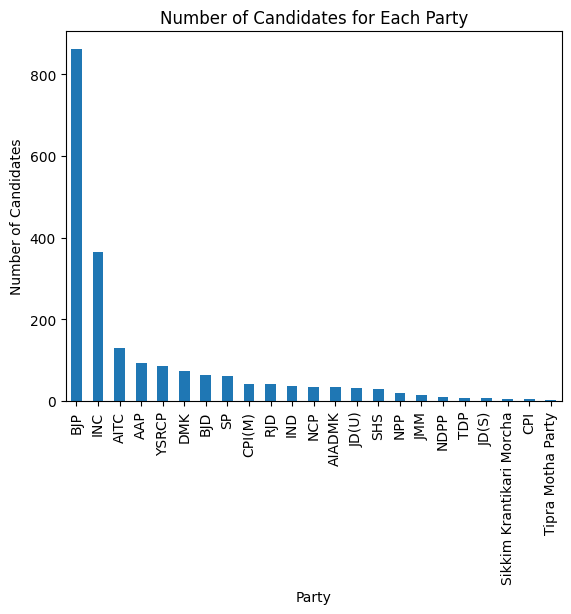

In [5]:
import matplotlib.pyplot as plt

party_counts = train_data['Party'].value_counts()

party_counts.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates for Each Party')
plt.show()

In [6]:
pd.DataFrame(train_data['Criminal Case'].describe())

,Criminal Case
count,2059.000000
mean,1.777562
std,4.762183
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,87.000000


In [7]:
criminal = train_data[train_data['Criminal Case'] > 6]
criminal

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
38,38,V.D. Satheesan,PARAVUR,INC,7,6 Crore+,0,KERALA,Graduate Professional
39,39,Adv. Yashomati Chandrakant Thakur,TEOSA,INC,10,9 Crore+,8 Lac+,MAHARASHTRA,Graduate Professional
70,70,Adv. K.M. Sachindev,BALUSSERI,CPI(M),7,2 Crore+,0,KERALA,Graduate Professional
93,93,Rahul Subhashrao Kul,DAUND,BJP,7,4 Crore+,91 Lac+,MAHARASHTRA,Graduate Professional
103,103,Vinay Kulkarni,DHARWAD,INC,7,19 Crore+,1 Crore+,KARNATAKA,12th Pass
...,...,...,...,...,...,...,...,...,...
1965,1965,Karthikeyan K,RISHIVANDIYAM,DMK,34,15 Crore+,4 Crore+,TAMIL NADU,Graduate Professional
1994,1994,Gulab Singh,MATIALA,AAP,11,5 Crore+,5 Lac+,DELHI,12th Pass
1999,1999,Paresh Ram Das,CANNING PASCHIM (SC),AITC,9,56 Lac+,15 Lac+,WEST BENGAL,12th Pass
2018,2018,Eknath Sambhaji Shinde,KOPRI-PACHPAKHADI,SHS,18,0,3 Crore+,MAHARASHTRA,10th Pass


In [8]:
criminal['Party'].nunique()

15

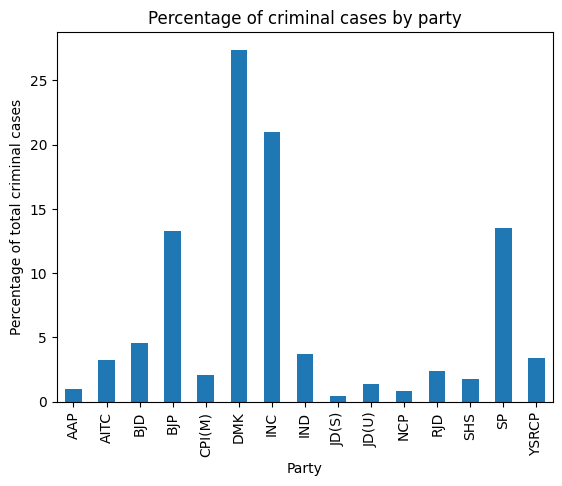

In [9]:
# Calculate the total number of criminal cases
total_cases = criminal['Criminal Case'].sum()

# Calculate the percentage of criminal cases by party
cases_by_party_percentage = (criminal.groupby('Party')['Criminal Case'].sum() / total_cases) * 100

# Plotting the data
cases_by_party_percentage.plot(kind='bar')
plt.title('Percentage of criminal cases by party')
plt.xlabel('Party')
plt.ylabel('Percentage of total criminal cases')
plt.show()

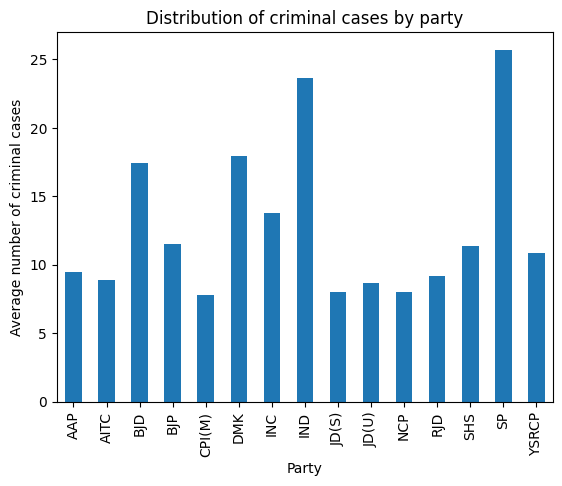

In [10]:
# Calculate the average of criminal cases by party
cases_by_party_mean = criminal.groupby('Party')['Criminal Case'].mean()

# Plotting the data
cases_by_party_mean.plot(kind='bar')
plt.title('Distribution of criminal cases by party')
plt.xlabel('Party')
plt.ylabel('Average number of criminal cases')
plt.show()

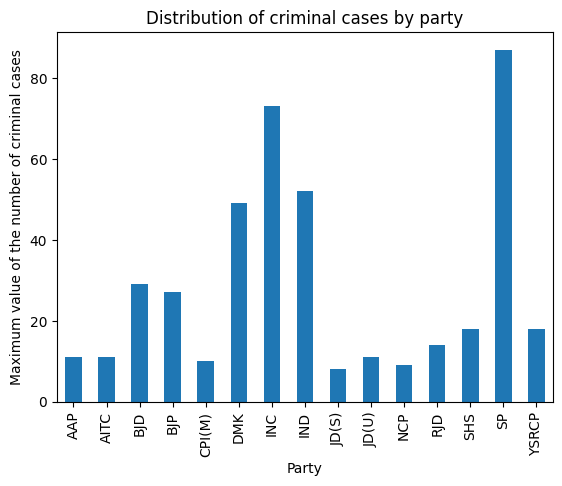

In [11]:
# Calculate the average of criminal cases by party
cases_by_party_max = criminal.groupby('Party')['Criminal Case'].max()

# Plotting the data
cases_by_party_max.plot(kind='bar')
plt.title('Distribution of criminal cases by party')
plt.xlabel('Party')
plt.ylabel('Maximum value of the number of criminal cases')
plt.show()

In [12]:
train_data.drop(['ID','Candidate','Constituency ∇'],axis = 1, inplace = True)
test_data.drop(['ID','Candidate','Constituency ∇'],axis = 1, inplace = True)

In [13]:
def convert_to_numeric(amount_str):
    multiplier = 1
    if 'Lac+' in amount_str:
        multiplier = 10 ** 5
    elif 'Crore+' in amount_str:
        multiplier = 10 ** 7
    elif 'Thou+' in amount_str:
        multiplier = 1000

    numeric_part = int(amount_str.split()[0])

    return (numeric_part * multiplier)

In [14]:
train_data['Total Assets'] = train_data['Total Assets'].apply(convert_to_numeric)
train_data['Liabilities'] = train_data['Liabilities'].apply(convert_to_numeric)
test_data['Total Assets'] = test_data['Total Assets'].apply(convert_to_numeric)
test_data['Liabilities'] = test_data['Liabilities'].apply(convert_to_numeric)


In [15]:
train_data.describe()

,Criminal Case,Total Assets,Liabilities
count,2059.000000,2.059000e+03,2.059000e+03
mean,1.777562,1.155991e+08,2.159068e+07
std,4.762183,4.922465e+08,2.048612e+08
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,9.500000e+06,4.850000e+04
50%,0.000000,2.000000e+07,1.800000e+06
75%,2.000000,8.000000e+07,8.900000e+06
max,87.000000,1.267000e+10,8.810000e+09


In [16]:
wealthy = train_data[train_data['Total Assets'] - train_data['Liabilities']> 650000000]
wealthy

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
89,YSRCP,0,1590000000,170000000,ANDHRA PRADESH,Post Graduate
94,AAP,2,800000000,110000000,DELHI,12th Pass
119,YSRCP,0,810000000,150000000,ANDHRA PRADESH,Graduate
129,BJP,0,1090000000,0,ARUNACHAL PRADESH,Graduate
189,INC,0,690000000,30000000,TAMIL NADU,Post Graduate
279,INC,1,1890000000,240000000,KARNATAKA,Graduate
294,IND,1,1410000000,80000000,HARYANA,Graduate
330,TDP,2,2740000000,150000000,ANDHRA PRADESH,Graduate
353,INC,1,2960000000,770000000,KARNATAKA,Graduate


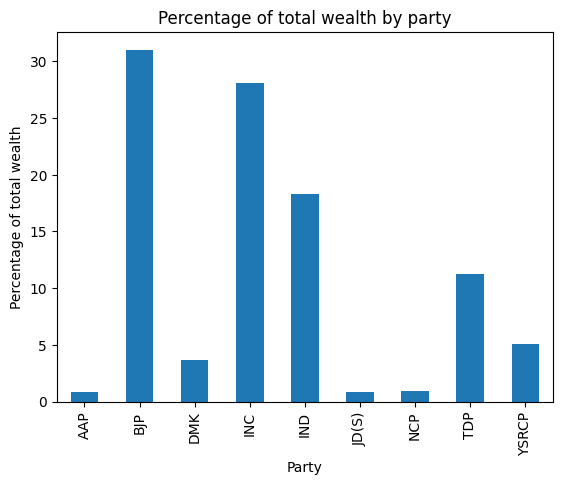

In [17]:
total_wealth = wealthy['Total Assets'].sum() - wealthy['Liabilities'].sum()

wealthy_by_party_percentage = ((wealthy.groupby('Party')['Total Assets'].sum() - wealthy.groupby('Party')['Liabilities'].sum()) / total_wealth) * 100

wealthy_by_party_percentage.plot(kind='bar')
plt.title('Percentage of total wealth by party')
plt.xlabel('Party')
plt.ylabel('Percentage of total wealth')
plt.show()

<ipython-input-18-679b68531350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealthy['Wealth'] = wealthy['Total Assets'] - wealthy['Liabilities']


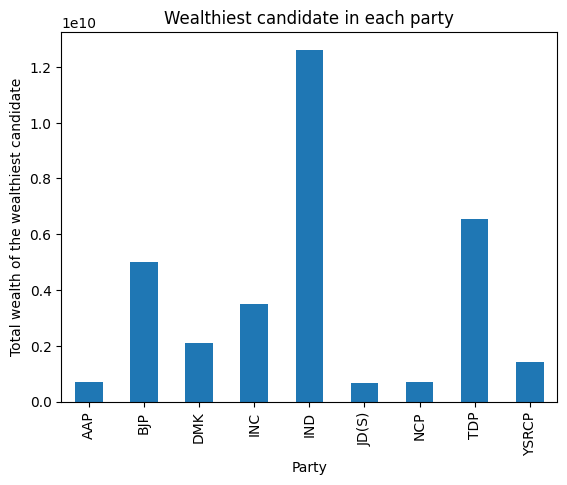

In [18]:
# Calculate the wealth (assets - liabilities) for each candidate
wealthy['Wealth'] = wealthy['Total Assets'] - wealthy['Liabilities']

# Find the wealthiest candidate in each party
wealthiest_in_party = wealthy.groupby('Party')['Wealth'].max()

wealthiest_in_party.plot(kind='bar')
plt.title('Wealthiest candidate in each party')
plt.xlabel('Party')
plt.ylabel('Total wealth of the wealthiest candidate')
plt.show()

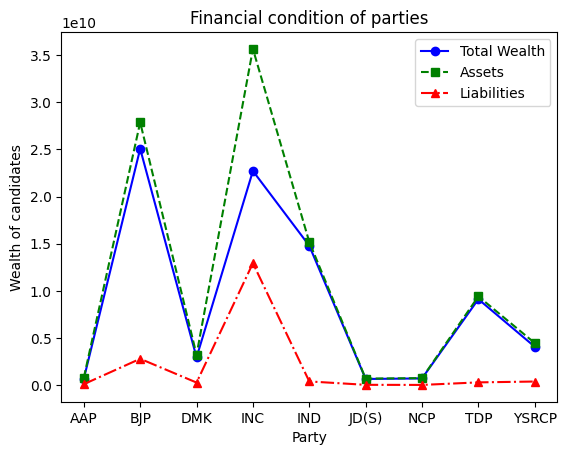

In [19]:
y1 = wealthy.groupby('Party')['Wealth'].sum()
y2 = wealthy.groupby('Party')['Total Assets'].sum()
y3 = wealthy.groupby('Party')['Liabilities'].sum()

# Plotting the three line plots on the same graph
plt.plot(y1, label='Total Wealth', color='blue', linestyle='-', marker='o')
plt.plot(y2, label='Assets', color='green', linestyle='--', marker='s')
plt.plot(y3, label='Liabilities', color='red', linestyle='-.', marker='^')

plt.xlabel('Party')
plt.ylabel('Wealth of candidates')
plt.title('Financial condition of parties')
plt.legend()
plt.show()


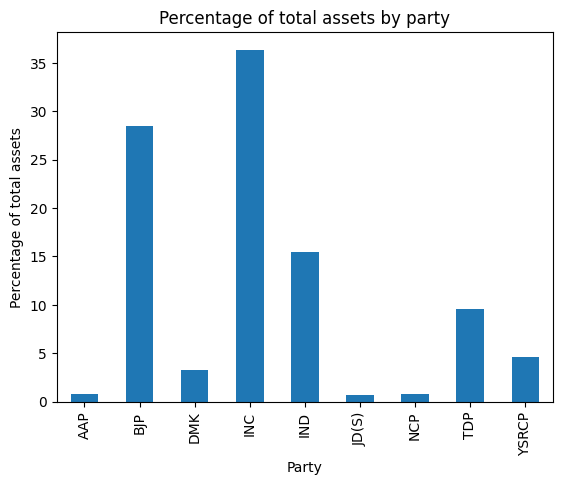

In [20]:
total_assets = wealthy['Total Assets'].sum()

assets_by_party_percentage = (wealthy.groupby('Party')['Total Assets'].sum() / total_assets) * 100

assets_by_party_percentage.plot(kind='bar')
plt.title('Percentage of total assets by party')
plt.xlabel('Party')
plt.ylabel('Percentage of total assets')
plt.show()

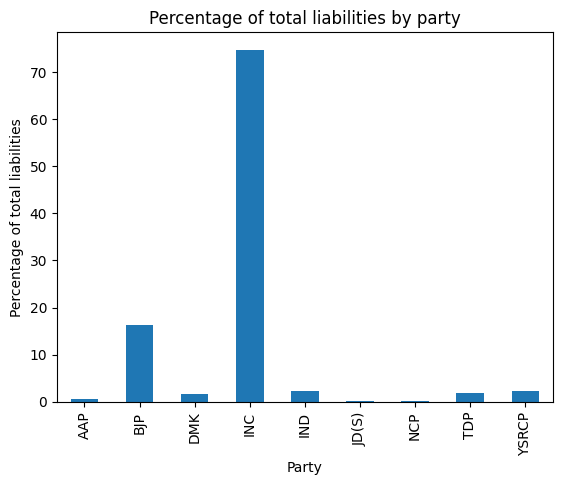

In [21]:
total_liabilities = wealthy['Liabilities'].sum()

liabilities_by_party_percentage = (wealthy.groupby('Party')['Liabilities'].sum() / total_liabilities) * 100

liabilities_by_party_percentage.plot(kind='bar')
plt.title('Percentage of total liabilities by party')
plt.xlabel('Party')
plt.ylabel('Percentage of total liabilities')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
party_label_encoder = LabelEncoder()
train_data['Party'] = party_label_encoder.fit_transform(train_data['Party'])
test_data['Party'] = party_label_encoder.transform(test_data['Party'])

In [23]:
state_label_encoder = LabelEncoder()
train_data['state'] = state_label_encoder.fit_transform(train_data['state'])
test_data['state'] = state_label_encoder.transform(test_data['state'])

In [24]:
from sklearn.preprocessing import OrdinalEncoder
education_order = ['Literate','5th Pass','8th Pass','10th Pass','12th Pass','Graduate','Graduate Professional','Post Graduate','Doctorate','Others']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
train_data['Education'] = ordinal_encoder.fit_transform(train_data[['Education']])

In [25]:
train_data.describe()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
count,2059.000000,2059.000000,2.059000e+03,2.059000e+03,2059.000000,2059.000000
mean,6.768820,1.777562,1.155991e+08,2.159068e+07,14.675571,5.159301
std,5.310018,4.762183,4.922465e+08,2.048612e+08,8.551146,1.617409
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,0.000000,9.500000e+06,4.850000e+04,7.000000,4.000000
50%,4.000000,0.000000,2.000000e+07,1.800000e+06,14.000000,5.000000
75%,8.000000,2.000000,8.000000e+07,8.900000e+06,23.000000,6.000000
max,22.000000,87.000000,1.267000e+10,8.810000e+09,27.000000,9.000000


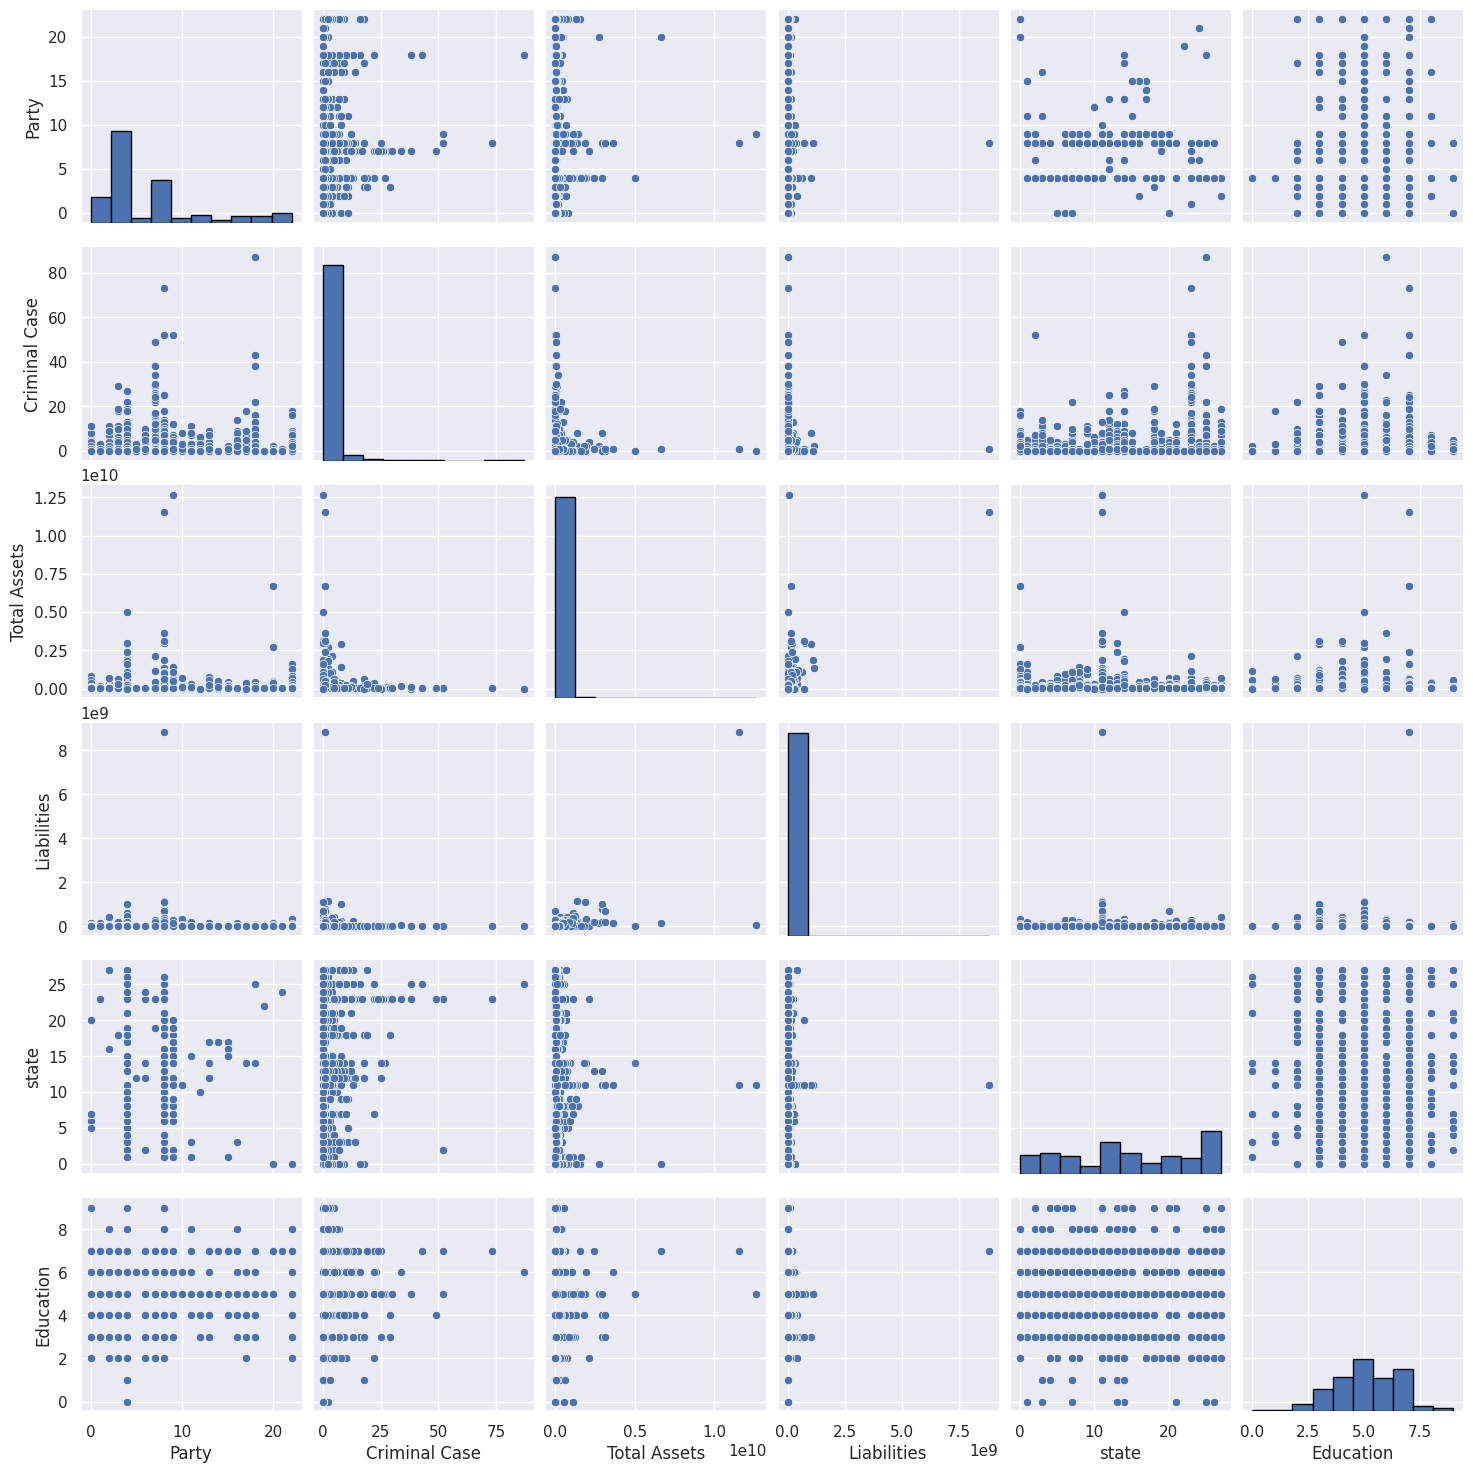

In [26]:
import seaborn as sns
%matplotlib inline

sns.set_theme()
sns.pairplot(train_data,diag_kws = {'alpha':1, 'bins':10, 'edgecolor':'black'})

In [27]:
train_y = train_data['Education']
train_X = train_data.drop(['Education'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=59, min_samples_leaf = 7, bootstrap = False)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred, average='weighted')
f1

0.20260593671608423

In [31]:
clf = RandomForestClassifier(n_estimators=300, random_state=59, min_samples_leaf = 7, bootstrap = False)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_data)

In [32]:
y_pred = y_pred.astype(int)

y_pred = np.array(y_pred)
education_order = np.array(education_order)
predictions = education_order[y_pred]

predictions = pd.Series(predictions)

test_data_1 = pd.read_csv("test.csv")

columns = {'ID': test_data_1['ID'],'Education': predictions}
submission = pd.concat(columns, axis =1)

submission.to_csv('submission.csv', index = False)